In [54]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, PrecisionRecallDisplay, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from itertools import cycle
import warnings
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from collections import Counter
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import statsmodels.api as sm
from sklearn.utils import shuffle
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize
from io import BytesIO
from zipfile import ZipFile
import zipfile

In [55]:
zip_file_path = 'data1.zip'
csv_file_inside_zip = 'data2.csv'

In [56]:
with ZipFile(zip_file_path, 'r') as zip_file:
    with zip_file.open(csv_file_inside_zip) as csv_file:
        df = pd.read_csv(csv_file)

In [57]:
warnings.filterwarnings("ignore")

In [58]:
df

,People_in_house,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,...,Hour,Mode,Distance_in_kms,Go to/return from work,Other motives,Service/Education/Business,Shopping/Grocery,Social and recreational,Tours/hiking,Visits
0,1,1,42,0,2,1,1,0,0,1,...,4,0,6.0,0,0,0,1,0,0,0
1,1,1,42,0,2,1,1,0,0,1,...,4,0,6.0,0,0,0,1,0,0,0
2,1,1,42,0,2,1,1,0,0,1,...,5,1,1.0,0,0,0,0,0,0,1
3,1,1,42,0,2,1,1,0,0,1,...,6,1,1.0,0,0,0,0,0,0,1
4,2,1,42,0,2,1,1,0,0,1,...,3,0,3.0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631257,3,0,49,1,4,1,1,0,0,12,...,5,0,11.0,0,0,1,0,0,0,0
631258,3,0,49,1,4,1,1,0,0,12,...,6,2,1.1,0,0,0,1,0,0,0
631259,3,0,49,1,4,1,1,0,0,12,...,6,2,0.6,0,0,0,1,0,0,0
631260,3,0,49,1,4,1,1,0,0,12,...,6,0,6.3,0,0,0,0,1,0,0


In [6]:
drops = ["Mode"]
X = df.drop(drops, axis=1)

<Axes: >

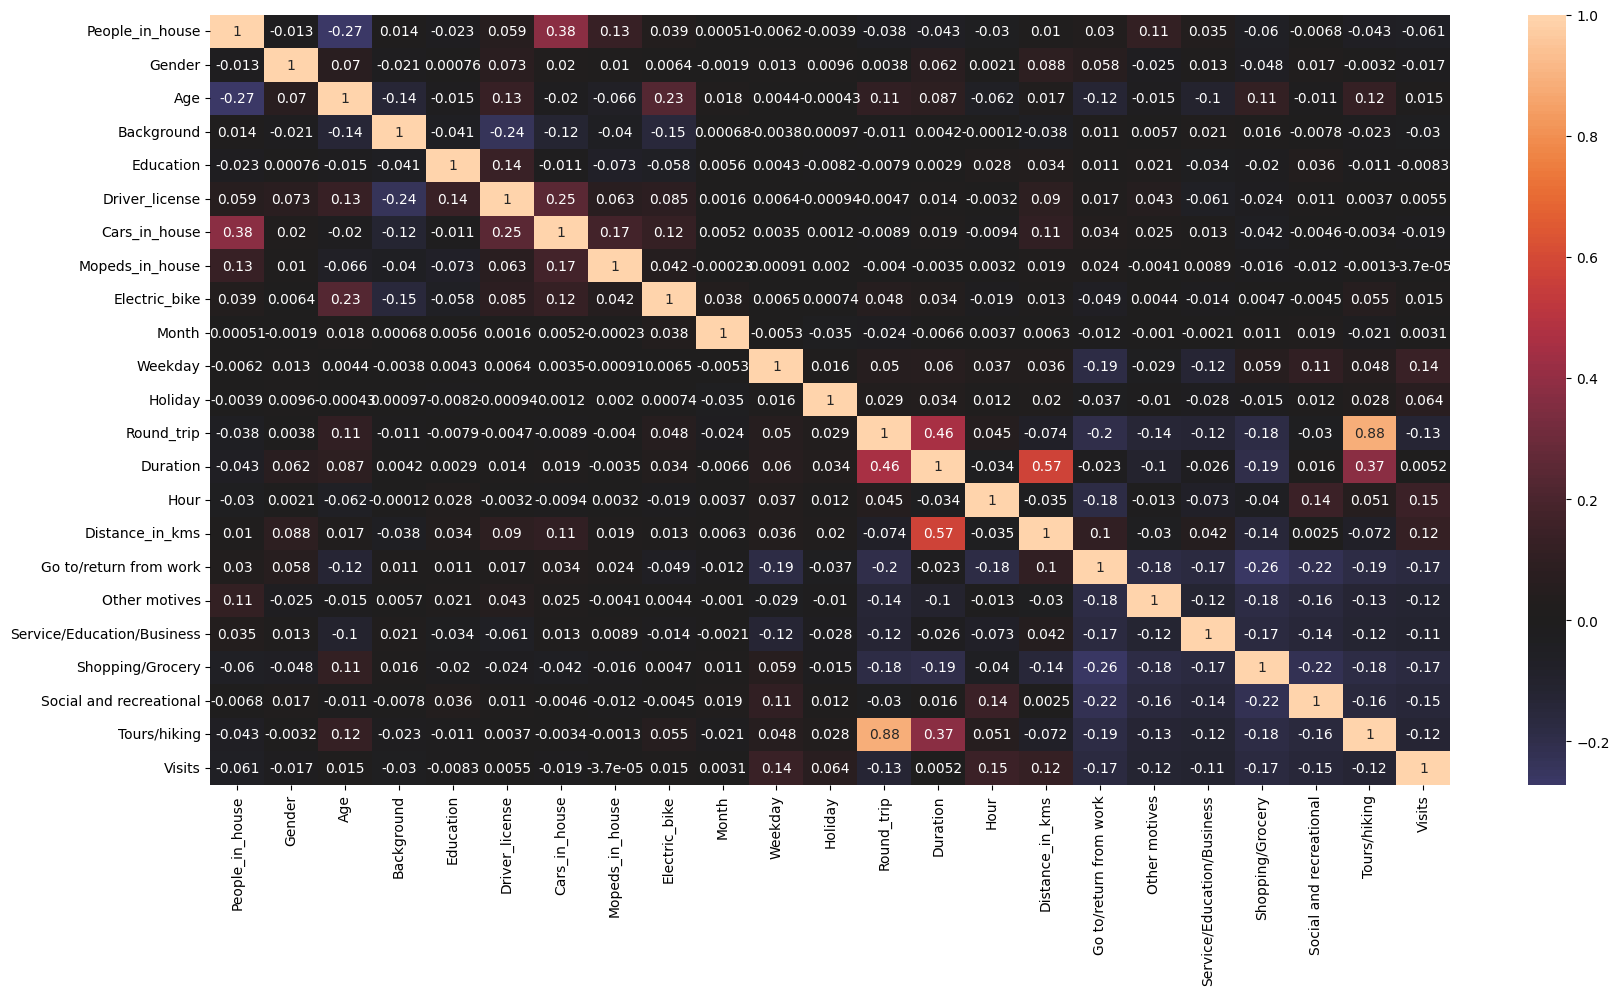

In [7]:
corrMatrix = X.corr()
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrMatrix, annot=True, center=0, ax=ax)

In [59]:
drops = ["Mode", "Tours/hiking", "Round_trip"]
X = df.drop(drops, axis=1)
y = df["Mode"]

In [60]:
X, y = shuffle(X, y, random_state=42)

In [61]:
X.shape

(631262, 21)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42, stratify=y)

In [63]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("Class counts in y_train:")
print(y_train_series.value_counts())

print("\nClass counts in y_test:")
print(y_test_series.value_counts())

Class counts in y_train:
Mode
0    234989
1    145022
2    124998
Name: count, dtype: int64

Class counts in y_test:
Mode
0    58748
1    36256
2    31249
Name: count, dtype: int64


In [64]:
X_train.shape, X_test.shape

((505009, 21), (126253, 21))

In [65]:
X_test

,People_in_house,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,...,Holiday,Duration,Hour,Distance_in_kms,Go to/return from work,Other motives,Service/Education/Business,Shopping/Grocery,Social and recreational,Visits
259325,1,0,35,0,4,1,1,0,0,2,...,0,4,6,0.2,0,0,0,1,0,0
223164,1,1,21,0,2,1,1,0,0,11,...,0,23,3,4.3,0,0,0,0,1,0
440347,1,0,29,0,4,1,1,1,0,8,...,0,15,8,6.0,0,1,0,0,0,0
414653,2,0,41,0,4,1,2,0,0,5,...,0,10,7,3.0,0,0,0,0,1,0
320451,2,0,70,0,4,1,1,0,0,8,...,0,20,5,19.3,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226338,1,1,55,0,2,1,1,0,0,11,...,0,20,8,5.0,0,0,0,0,1,0
222614,2,0,24,1,2,1,2,0,0,11,...,0,5,7,1.1,0,0,0,1,0,0
137860,4,0,21,1,2,1,1,0,0,1,...,0,40,6,2.0,0,0,0,0,0,0
628657,3,0,53,0,4,1,2,1,0,9,...,0,30,3,26.0,1,0,0,0,0,0


In [66]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# We run the default models here

# Logistic Regression

In [67]:
logreg_model = LogisticRegression(multi_class='ovr')
logreg_model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [68]:
y_pred_log = logreg_model.predict(X_test)
Log_Report = classification_report(y_test, y_pred_log)
print('Log_Report:', Log_Report, sep='\n')

Log_Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82     58748
           1       0.62      0.52      0.57     36256
           2       0.79      0.69      0.73     31249

    accuracy                           0.73    126253
   macro avg       0.72      0.70      0.71    126253
weighted avg       0.73      0.73      0.73    126253



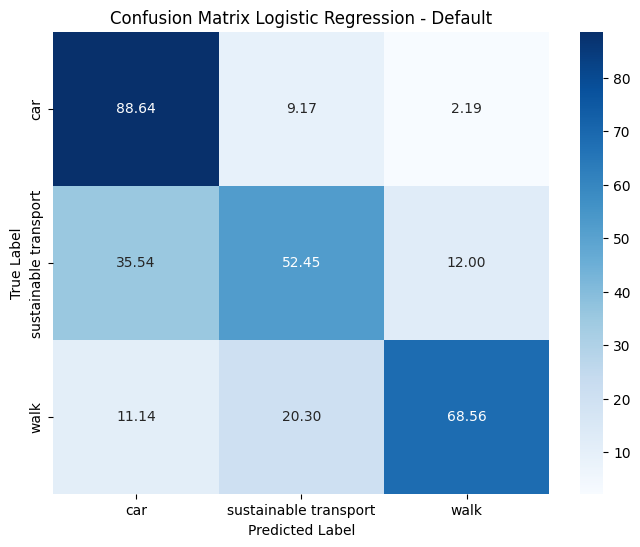

In [69]:
class_labels = ["car", "sustainable transport", "walk"]
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_log) / conf_matrix_log.sum(axis=1)
conf_matrix_percentages_log = (conf_matrix_log.T / conf_matrix_log.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_log, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Logistic Regression - Default')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Decision Tree

In [75]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [76]:
y_pred = dt.predict(X_test)
tree_report_test = classification_report(y_test, y_pred)
print(tree_report_test, sep='\n')

              precision    recall  f1-score   support

           0       0.84      0.84      0.84     58748
           1       0.65      0.66      0.66     36256
           2       0.81      0.80      0.81     31249

    accuracy                           0.78    126253
   macro avg       0.77      0.77      0.77    126253
weighted avg       0.78      0.78      0.78    126253



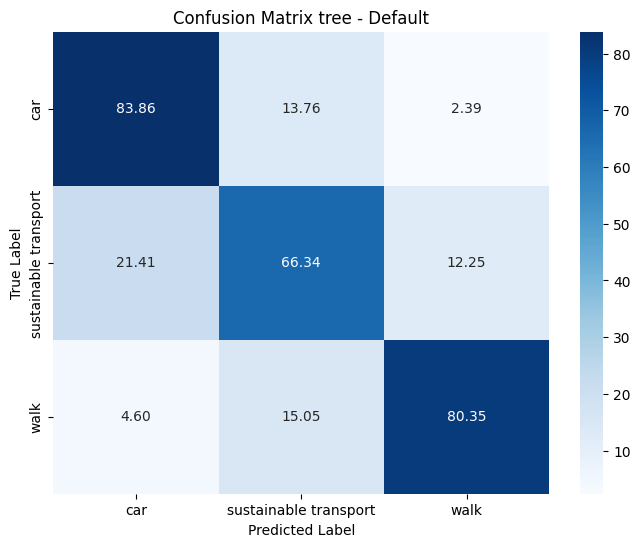

In [77]:
class_labels = ["car", "sustainable transport", "walk"]
conf_matrix_dt = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_dt) / conf_matrix_dt.sum(axis=1)
conf_matrix_percentages_dt = (conf_matrix_dt.T / conf_matrix_dt.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_dt, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix tree - Default')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Random Forest

In [78]:
rf = RandomForestClassifier(random_state =42, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [79]:
y_pred = rf.predict(X_test)
tree_report_test = classification_report(y_test, y_pred)
print(tree_report_test, sep='\n')

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     58748
           1       0.76      0.74      0.75     36256
           2       0.86      0.88      0.87     31249

    accuracy                           0.85    126253
   macro avg       0.84      0.84      0.84    126253
weighted avg       0.84      0.85      0.85    126253



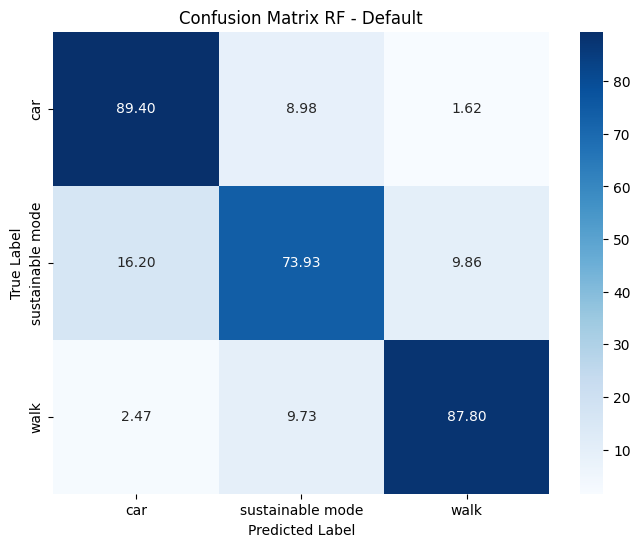

In [80]:
class_labels = ["car", "sustainable mode", "walk"]
conf_matrix_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_rf) / conf_matrix_rf.sum(axis=1)
conf_matrix_percentages_rf = (conf_matrix_rf.T / conf_matrix_rf.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_rf, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix RF - Default')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# XGBoost

In [81]:
xb= xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)
xb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [82]:
y_pred = xb.predict(X_test)
tree_report_test = classification_report(y_test, y_pred)
print(tree_report_test, sep='\n')

              precision    recall  f1-score   support

           0       0.87      0.86      0.87     58748
           1       0.70      0.70      0.70     36256
           2       0.84      0.86      0.85     31249

    accuracy                           0.81    126253
   macro avg       0.80      0.81      0.80    126253
weighted avg       0.81      0.81      0.81    126253



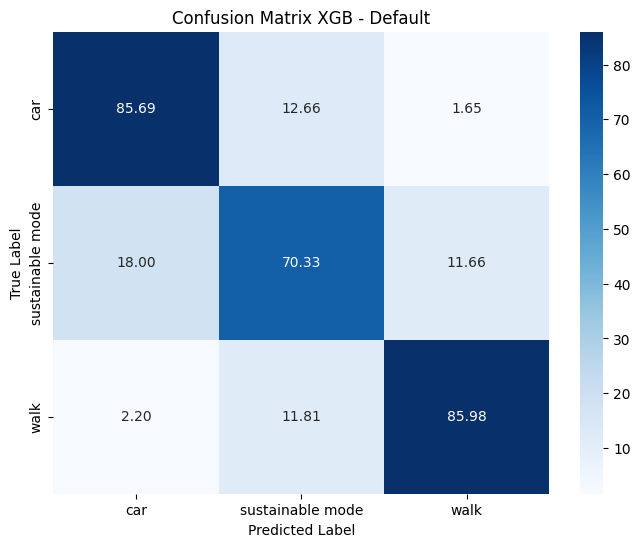

In [83]:
class_labels = ["car", "sustainable mode", "walk"]
conf_matrix_xgb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_xgb) / conf_matrix_xgb.sum(axis=1)
conf_matrix_percentages_xgb = (conf_matrix_xgb.T / conf_matrix_xgb.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_xgb, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix XGB - Default')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()